In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Load the data

In [2]:
seed = 7
np.random.seed(seed)

In [3]:
data_train_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/split/Combined_All_Test_70.csv'
data_test_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/split/Combined_All_Train_70.csv'

tx_train = pd.read_csv(data_train_path,sep=",",squeeze=True)
X_train=tx_train.iloc[:, :400]
ytr = pd.read_csv(data_train_path,sep=",",usecols=[400],squeeze=True)
y_train = tf.keras.utils.to_categorical(ytr,num_classes=14)

tx_test = pd.read_csv(data_test_path,sep=",",squeeze=True)
X_test=tx_test.iloc[:, :400]
yte = pd.read_csv(data_test_path,sep=",",usecols=[400],squeeze=True)
y_test = tf.keras.utils.to_categorical(yte,num_classes=14)

def add_column_names(data):
    
    liste=[]
    for i in range(400):
        liste.append(str(i+1))
    data.columns=liste
    return data

X_train = add_column_names(X_train)
X_test = add_column_names(X_test)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7420, 400)
(7420, 14)
(4393, 400)
(4393, 14)


## Preprocessing

### Correlation between features

Remove correlated features

In [5]:
corr = X_train.corr()
correlated_features=set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)

X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

C:\Users\manon\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
print(X_train.shape)
print(X_test.shape)

(7420, 229)
(4393, 229)


### Removing features with low variance

In [8]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.4)
sel.fit(X_train)
X_train = (pd.DataFrame(sel.transform(X_train)))
X_test = (pd.DataFrame(sel.transform(X_test)))

In [9]:
print(X_train.shape)
print(X_test.shape)

(7420, 145)
(4393, 145)


## Training

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(x, ycat, test_size=0.2, random_state=4)
n_samples, n_features = X_train.shape[0], X_train.shape[1]
n_outputs=14

In [8]:
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D, Flatten, Dense

model = tf.keras.Sequential()
model.add(Conv1D(filters=12, kernel_size=5, activation='relu',input_shape=(n_features, 1)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, input_dim=199, activation='relu'))
model.add(Dense(14, activation='softmax'))
#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, model):
    epochs, batch_size = 10, 1
    n_samples, n_features = X_train.shape[0], X_train.shape[1]
    n_outputs=14
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size)
    return accuracy

In [10]:
print(X_train.shape)
X_train=tf.expand_dims(X_train, axis=-1)
print(X_train.shape)


(7420, 229)
(7420, 229, 1)


In [11]:
print(X_test.shape)
X_test=tf.expand_dims(X_test, axis=-1)
print(X_test.shape)

(4393, 229)
(4393, 229, 1)


In [12]:
evaluate_model(X_train, y_train, X_test, y_test, model)

Epoch 1/10
7420/7420 [==============================] - 16s 2ms/step - loss: 2.0030 - accuracy: 0.3327
Epoch 2/10
7420/7420 [==============================] - 16s 2ms/step - loss: 1.4145 - accuracy: 0.5197
Epoch 3/10
7420/7420 [==============================] - 14s 2ms/step - loss: 1.1355 - accuracy: 0.6112
Epoch 4/10
7420/7420 [==============================] - 14s 2ms/step - loss: 0.9667 - accuracy: 0.6745
Epoch 5/10
7420/7420 [==============================] - 16s 2ms/step - loss: 0.7724 - accuracy: 0.7456
Epoch 6/10
7420/7420 [==============================] - 14s 2ms/step - loss: 0.6463 - accuracy: 0.7873
Epoch 7/10
7420/7420 [==============================] - 17s 2ms/step - loss: 0.5880 - accuracy: 0.8067
Epoch 8/10
7420/7420 [==============================] - 17s 2ms/step - loss: 0.5378 - accuracy: 0.8244 0s - loss: 0.5358 - ac
Epoch 9/10
7420/7420 [==============================] - 16s 2ms/step - loss: 0.5137 - accuracy: 0.8363
Epoch 10/10
4393/4393 [===========================

0.18301843106746674

### Prediction of the model on the test set
Remark: Accuracy should be the same as the one just above

In [19]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

In [23]:
#yshape=np.zeros(14)
#Y_test=np.argmax(y_test, axis=1)#, out=yshape
acc = sum(1 for y_p, y_t in zip(y_pred, yte) if y_p == y_t)
score = acc/len(y_pred)
print('Accuracy = ', score)

Accuracy =  0.18301843842476667


In [15]:
yte = yte.astype(np.int64) # Change the variable type to match the one of the predicted 
yte.dtype

dtype('int64')

## Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
lbs=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
cf_matrix = confusion_matrix(yte, y_pred,labels=lbs)
#print(cf_matrix)

[[  6   0  24  13  73   3   0   3  15   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0  46   7  80  12  18  17  25  41  15   1  19   0]
 [  0   0   3  52  86  15  14  20  29  26  47   1  31   0]
 [ 14   0 105  36 422  69  88  36 104 145  34   3 102   0]
 [  0   0  33  21  99  14   6   4   8  22  12   0   4   0]
 [  0   0  47  37 134  22  34  11  86  59  33   0  29   0]
 [  2   0  14  29  60  12   6  33  30  16   9   0  11   0]
 [  5   0  42  11 171  21  45   6  76  47  14   0  27   0]
 [  3   0  65  18 186  31  21  20  61  77   8   0  46   0]
 [  0   0   8   6  43  12   4   0   9  20  10   0  13   0]
 [  5   0  21   2  51  14  13   2  27   7   7   3   4   0]
 [  0   0  38  17  54  13  16   4  17  70  11   1  31   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


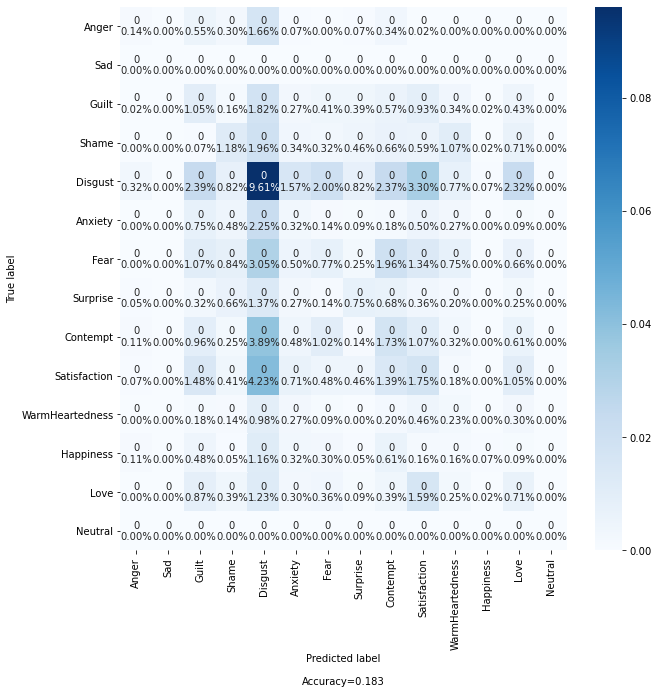

In [17]:
import seaborn as sns
from cf_matrix import make_confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

categories = ['Anger','Sad','Guilt','Shame','Disgust','Anxiety','Fear','Surprise','Contempt','Satisfaction',
            'WarmHeartedness','Happiness', 'Love', 'Neutral' ]
make_confusion_matrix(cf_matrix/np.sum(cf_matrix),
             categories=categories, cmap='Blues')

In [15]:
print(cf_matrix.sum())

4393


# To save the trained model

In [16]:
saving_path='C:/Users/manon/Desktop/Projet_2 _ML/code/models/'
name='model_cnn_split_1'
model.save(saving_path+name)

INFO:tensorflow:Assets written to: C:/Users/manon/Desktop/Projet_2 _ML/code/models/model_cnn_split_1\assets


# Plot the model

In [101]:
from tensorflow.keras.utils import plot_model#see the inputs and outputs
import graphviz
import pydot

modele = tf.keras.Sequential()
modele.add(Dense(8, input_dim=400, activation='relu'))
modele.add(Dense(14, activation='softmax'))
# Compile model
modele.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(modele,show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
